In [1]:
!pip install yfinance
!pip install plotly

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 18.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf
import plotly.graph_objs as go

In [85]:
data = yf.download(tickers='BTC-USD', start='2019-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2022-02-17,43937.070312,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2022-02-18,40552.132812,40929.152344,39637.617188,40030.976562,40030.976562,23310007704
2022-02-19,40026.023438,40418.878906,39713.058594,40122.156250,40122.156250,13736557863


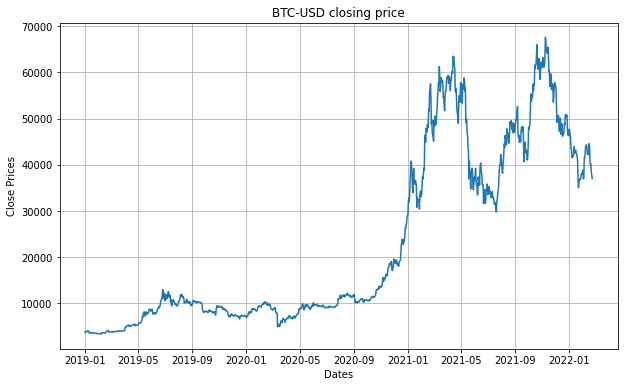

In [5]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('BTC-USD closing price')
plt.show()

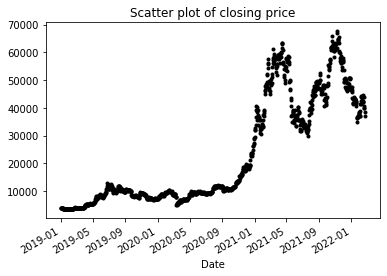

In [6]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [7]:
!pip install fbprophet

In [8]:
data.reset_index(inplace=True)
df = data.rename(columns = {'index':'Date'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1148 non-null   datetime64[ns]
 1   Open       1148 non-null   float64       
 2   High       1148 non-null   float64       
 3   Low        1148 non-null   float64       
 4   Close      1148 non-null   float64       
 5   Adj Close  1148 non-null   float64       
 6   Volume     1148 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 62.9 KB


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = df[['Date', 'Close']]
df = df.rename(columns={'Date':'ds', 'Close':'y'})
train_data, test_data = df[3:int(len(df)*0.9)], df[int(len(df)*0.9):]

In [11]:
df

,ds,y
0,2019-01-01,3843.520020
1,2019-01-02,3943.409424
2,2019-01-03,3836.741211
3,2019-01-04,3857.717529
4,2019-01-05,3845.194580
...,...,...
1143,2022-02-17,40538.011719
1144,2022-02-18,40030.976562
1145,2022-02-19,40122.156250
1146,2022-02-20,38431.378906


In [12]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=5, freq='D')
future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
1148,2022-02-23
1149,2022-02-24
1150,2022-02-25
1151,2022-02-26


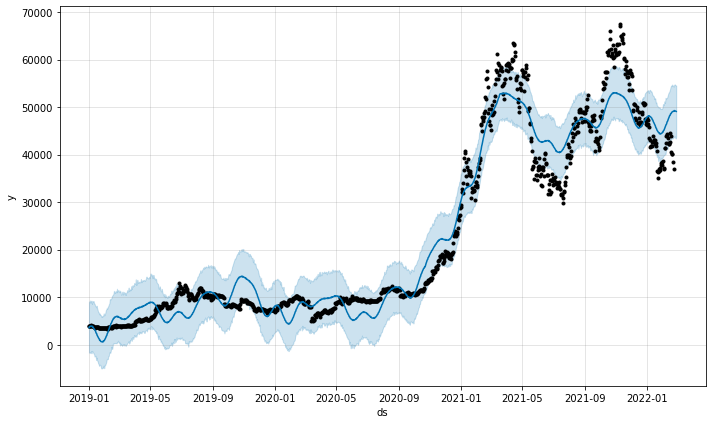

In [14]:
forecast_close = m.predict(future)
figure = m.plot(forecast_close)
figure.show()

In [15]:
forecast_close

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,3492.887638,-1678.085366,9086.969540,3492.887638,3492.887638,77.902444,77.902444,77.902444,-74.015101,-74.015101,-74.015101,151.917545,151.917545,151.917545,0.0,0.0,0.0,3570.790082
1,2019-01-02,3528.718908,-1580.707358,8968.042051,3528.718908,3528.718908,303.898248,303.898248,303.898248,71.758226,71.758226,71.758226,232.140022,232.140022,232.140022,0.0,0.0,0.0,3832.617156
2,2019-01-03,3564.550179,-1511.360471,9311.745821,3564.550179,3564.550179,228.411576,228.411576,228.411576,-55.032777,-55.032777,-55.032777,283.444353,283.444353,283.444353,0.0,0.0,0.0,3792.961755
3,2019-01-04,3600.381450,-1761.525781,8827.223677,3600.381450,3600.381450,298.808678,298.808678,298.808678,-4.878776,-4.878776,-4.878776,303.687454,303.687454,303.687454,0.0,0.0,0.0,3899.190128
4,2019-01-05,3636.212721,-1371.325655,9226.003542,3636.212721,3636.212721,296.595795,296.595795,296.595795,5.205293,5.205293,5.205293,291.390502,291.390502,291.390502,0.0,0.0,0.0,3932.808516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,2022-02-23,48695.711680,43742.177153,54698.881830,48695.711680,48695.711680,593.236212,593.236212,593.236212,71.758226,71.758226,71.758226,521.477985,521.477985,521.477985,0.0,0.0,0.0,49288.947891
1149,2022-02-24,48713.269894,43894.257827,54799.403762,48713.269894,48713.269894,447.937073,447.937073,447.937073,-55.032777,-55.032777,-55.032777,502.969850,502.969850,502.969850,0.0,0.0,0.0,49161.206967
1150,2022-02-25,48730.828108,43623.170631,54671.189207,48730.828108,48730.828108,459.823908,459.823908,459.823908,-4.878776,-4.878776,-4.878776,464.702684,464.702684,464.702684,0.0,0.0,0.0,49190.652016
1151,2022-02-26,48748.386322,43370.567173,54511.130276,48748.386322,48748.386322,414.299960,414.299960,414.299960,5.205293,5.205293,5.205293,409.094667,409.094667,409.094667,0.0,0.0,0.0,49162.686282


In [138]:
df = forecast_close[['ds', 'yhat']]
df = df.rename(columns={'ds':'Date',
                   'yhat':'Close'})
df = df.set_index('Date')

In [140]:
df

,Close
Date,
2019-01-01,3570.790082
2019-01-02,3832.617156
2019-01-03,3792.961755
2019-01-04,3899.190128
2019-01-05,3932.808516
...,...
2022-02-23,49288.947891
2022-02-24,49161.206967
2022-02-25,49190.652016


In [141]:
!mkdir data
df.to_excel('data/Close_datetime.xlsx', index=False)

In [142]:
pd.read_excel('data/Close_datetime.xlsx')

,Close
0,3570.790082
1,3832.617156
2,3792.961755
3,3899.190128
4,3932.808516
...,...
1148,49288.947891
1149,49161.206967
1150,49190.652016
1151,49162.686282
